  <img src="https://zone.msn.com/images/v9/en-us/game/bljk/960x300_bljk.jpg" width="980" align="center"/>

## BLACK JACK GAME : MULTI-PLAYER
### This game was written by using OOP paradigm.

In [328]:
from IPython.display import Image
from IPython.display import YouTubeVideo
from IPython.display import clear_output
from IPython.core.display import display, HTML
import time
import random

## BASIC GAME RULES:
### 1. Blackjack pays 3 to 2
### 2. Insurance pays 2 to 1
### 3. Dealer must draw to 16 and stand on all 17's
### 4. Even money are allowed
### 5. Surrenders are allowed only in the begining of the game and if insurance was not taken yet
### 6. If two Aces were split, only one card can be dealed to each hand
### 7. Max number of players: 7
### 8. Max decks: 8. Deck will be autamatically reshuffled if remaining cards will be less or equal 20% from total initial number of cards.
#### more info: https://bicyclecards.com/how-to-play/blackjack/

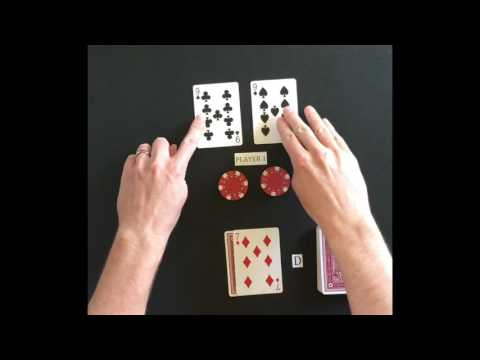

In [332]:
display(YouTubeVideo('VB-6MvXvsKo'))

 ###  CARD VALUES       
 <img src="https://cherrypopfilm.com/wp-content/uploads/2020/09/blackjack-card-values-1024x5451-1.jpg" width="500" height="240" align="center"/>

###  BASIC STRATEGY    
 <img src="https://www.onlinegamblingsites.com/wp-content/uploads/2020/01/Blackjack-Basic-Strategy-Chart-1.png" width="450"  align="center"/>

### CLASS CREATION

#### CREATION OF CARD CLASS

In [93]:
class Card:
    card_values=dict(Two=2,Three=3, Four=4, Five=5, Six=6, Seven=7, Eight=8, Nine=9, Ten=10, Jack=10, Queen=10, King=10, Ace=11)
    suits=("Clubs", "Spades", "Hearts","Diamonds")
    
    def __init__(self, suit, rank):
        if suit.capitalize() in self.suits and rank.capitalize() in self.card_values.keys():
            self.suit=suit.capitalize()
            self.rank=rank.capitalize()
            self.value=self.card_values[rank.capitalize()]
        else:
            raise KeyError("There is no such suit or rank!")
                     
    def __str__(self):
        return f"{self.rank} of {self.suit}"

#### CREATION OF DECK CLASS

In [94]:
class Deck:
    suits=("Clubs", "Spades", "Hearts","Diamonds")
    ranks=("Two","Three", "Four", "Five", "Six", "Seven", "Eight", "Nine", "Ten", "Jack", "Queen", "King", "Ace")
    
    def __init__(self,number_of_decks=1):
        self.number_of_decks=number_of_decks
        self.all_cards=[Card(x,y) for x in self.suits for y in self.ranks]*self.number_of_decks #self.all_cards is the list of all Card objects(instance)
        self.cutoff=round(len(self.all_cards)*1/5) #cutoff is 20 percent of deck
        
    def resize(self,number):  
        self.all_cards=[Card(x,y) for x in self.suits for y in self.ranks]*number
        self.cutoff=round(len(self.all_cards)*1/5)  
    
    def shuffle_deck(self):
        for i in range(10):
            random.shuffle(self.all_cards)
    
    def deal_one(self):
        if len(self.all_cards)<=self.cutoff:
            self.all_cards=[Card(x,y) for x in self.suits for y in self.ranks]*self.number_of_decks
            self.shuffle_deck()
            return self.all_cards.pop()
        else:
            return self.all_cards.pop()
    
    def __repr__(self):
        lst=[]
        for i in range(len(self.all_cards)):
            lst.append(f"{self.all_cards[i]}")
        return f"{lst}"
    

#### CREATION OF PLAYER CLASS

In [95]:
class Player:
    def __init__(self,name):
        self.name=name
        self.name2=None #this name will remain constant and will be used in method "split_cards". It will help to get rid of name duplicating when "split_cards" method will be called multiple times
        self.cards=[]
        self.points=0
        
    def empty_hand(self):
        self.cards=[]
        self.points=0
    

    def get_cards(self, new_card):
        self.cards.append(new_card)
        self.points=sum([x.value for x in self.cards])
        self.ranks=[y.value for y in self.cards]
        for i in range(len(self.cards)):
            if self.ranks[i]==11 and self.points>21:  #this condition is made in case if there are two aces in hand
                self.ranks[i]-=10
                self.points-=10
            else:
                pass
            
            
    def split_cards(self):
        if len(self.cards)==2:
            second_card=self.cards.pop()
            self.points=sum([x.value for x in self.cards])
            self.name2=self.name2 if self.name2 else f"{self.name}'s hand #1"
            return second_card
        else:
            raise ValueError("Only two(2) cards can be splitted!")
               
    
    def __repr__(self):
        lst=[]
        for i in range(len(self.cards)):
            lst.append(f"{self.cards[i]}")
        if self.name.lower()=='dealer' and len(self.cards)==2:
            return f"Dealer has [\u001b[7m              \u001b[0m, {lst[-1]}] cards, {self.cards[-1].value} points" #first dealer's card should be skipped
        else:
            return f"{self.name2} has {lst} cards, {self.points} points." if self.name2 else f"{self.name} has {lst} cards, {self.points} points."

#### CREATION OF CHIP CLASS

In [288]:


class Chip:
    def __init__(self):
        self.bet=0
        self.balance=1000 #initial balance
        self.chips=dict(white=50, blue=100,yellow=500,green=1000,brown=10000,red=50000,black=100000,all_in=self.bank)
    
    @property
    def bank(self):
        return self.balance
        
        
    @bank.setter
    def bank(self, value):
        assert value>=0, "Value of bank cannot be less than zero!"
        self.balance = value

        
    @property
    def bet_value(self):
        return self.bet
             
    @bet_value.setter
    def bet_value(self,value):
        assert value<=self.balance, "Value of bet cannot be higher than bank!"
        self.bet+=value
        self.balance-=value
               
    def bet(self, **kwargs):
        self.chips=dict(white=50, blue=100,yellow=500,green=1000,brown=10000,red=50000,black=100000,all_in=self.bank)
        lst_of_values=[]
        lst=[self.chips[x] for x in list(kwargs.keys())]
        for i,j in zip(lst,list(kwargs.values())):
            lst_of_values.append(i*j)
        self.bet_value=sum(lst_of_values)    
        if self.bet_value <= self.bank:
            self.bank-=self.bet_value
            print(self.bet_value)
        else:
            print("Unsifficient amount!")
            
            
    def bet_all(self):
        self.bet_value=self.balance
        print(self.bet_value)
            
    def receive(self,amount):
        self.bank+=amount
        
            
    def __str__(self):
        return f"{self.chips}\n current bank: {self.bank}$"
    
    
    def input_bet(self,name):
        self.chips=dict(white=50, blue=100,yellow=500,green=1000,brown=10000,red=50000,black=100000,all_in=self.bank)
        self.bet=0
        bet_more=''
        choose_type=None
        choose_number=None
        while bet_more!='n' and self.bank>=50:
            while choose_type!='n' and choose_type not in self.chips:
                print(f"\u001b[1mPlayer '{name}' make a bet.\u001b[0m".center(125))
                print(f"BANK: {self.bank}. BET: {self.bet_value}.".center(120))
                print("----Chips-----".center(120))
                print(f"\t\t[\u001b[49mwhite\u001b[0m: 50, \u001b[44mblue\u001b[0m:100, \u001b[43myellow\u001b[0m:500, \u001b[42mgreen\u001b[0m:1000, \u001b[103mbrown\u001b[0m:10000, \u001b[41mred\u001b[0m:50000, \u001b[7mblack\u001b[0m:100000, \u001b[1mall_in\u001b[0m:{self.bank}]")
                choose_type=input("\u001b[7m Choose chip type ('n' to exit): ").lower() 
                clear_output(wait=True)
             
            if choose_type=='n':
                bet_more='n'
                break
                
            elif choose_type=='all_in':
                self.bet_all()
                bet_more='n'
                break
            
            elif self.chips[choose_type]==self.bank:
                self.bet_all()
                
                
            elif self.chips[choose_type]<self.bank:
                while choose_number!=0:  
                    try:
                        choose_number=int(input("\u001b[7m Choose the number of quantity ('0' to cancel): "))
                        if (self.chips[choose_type])*choose_number<=self.bank:
                            break
                        else:
                            clear_output()
                            print("\u001b[41m Amount is higher than in bank!")   
                    except:
                        clear_output()
                        print(self.chips)
                        print(f'Chip: {choose_type}')      
                self.bet_value=self.chips[choose_type]*choose_number
                clear_output(wait=True) 
                
                if self.bank>=50:
                    print(f"\u001b[42m BANK: {self.bank}. BET: {self.bet_value}.")
                    bet_more=input('\u001b[7m Do you want to bet more? [y/n] : ').lower()    
                else:
                    pass
                choose_type=None
                choose_number=None
                clear_output()
                
            else:
                clear_output(wait=True) #change
                print("***\u001b[41m Unsufficient amount!***")
                time.sleep(2)
                choose_type=None
                choose_number=None
        
        return self.bet_value>0  
              

#### ILLUSTRATIONS FOR GAME

In [376]:
pic1=Image(url='https://zone.msn.com/images/v9/en-us/game/bljk/960x300_bljk.jpg',width=980)
pic2=Image(url='https://www.wheelingisland.com/-/media/gaming/wheeling-island/gaming/tablegames_pokerchips_1500x400.jpg?h=400&w=1500&la=en&hash=1A7CA3F95F2A23C67B9337094951A265DB12409C',width=1000)
pic3=Image(url='https://i.gifer.com/9TS.gif',width=980)
pic4=Image(url='https://content001.bet365.com/Casino/SGP/Promotions/LiveBlackjackChallenges/LiveBlackjackChallenges/LiveBlackjackChallenges_1200x300.jpg',width=980)
pic5=Image(url='https://gifimage.net/wp-content/uploads/2017/07/game-over-gif-10.gif',width=980)
pic6=Image(url='https://static.onecms.io/wp-content/uploads/sites/23/2020/04/20/money-made-simple-banner-2-2000.jpg',width=980)
pic7=Image(url='https://image.shutterstock.com/image-vector/sign-temporarily-closed-on-red-260nw-1711440685.jpg',width=980)


#### LOCAL FUNCTION: add_button()
#### This function is created to increase the readability of the MAIN code below. Code of function will be more interpretable after reviewing and familiarizing with the MAIN code. 

In [347]:
def add_button(buttons={}):
    global split_number
    dict_buttons={'0':'Stand', '1': 'Hit'}
    dict_buttons.update(buttons)
    if buttons:
        choose_option=input("0: 'Stand',\n1: 'Hit'\n"+'\n'.join(f"{i}: '{j}'" for i,j in buttons.items())+'\n')
    else:
        choose_option=input("0: 'Stand',\n1: 'Hit'\n")
        
    if choose_option in dict_buttons:
        if choose_option=='0':
            return False
    
        elif choose_option=='1':
            hand.get_cards(deck.deal_one())
            print(hand)
            
        elif choose_option=='2':
            hand.get_cards(deck.deal_one())
            chip_objs[player].bet_value=bets[player][hand_index]
            bets[player][hand_index]*=2
            return False
    
        elif choose_option=='3':
            split_number+=1
        
            player_objs[player].append(Player(f"{player}"))
            player_objs[player][-1].name2=f"{player}'s hand #{split_number}"
            
            player_objs[player][-1].get_cards(player_objs[player][hand_index].split_cards())
            insurance[player].append(None)
            
            even_moneys[player].append(False)
            
            bets[player].append(bets[player][hand_index])
            chip_objs[player].bet_value=bets[player][hand_index]
                    
        elif choose_option=='4':
            surrenders[player][hand_index]=True
            bets[player][hand_index]=bets[player][hand_index]/2
            return False
        
        elif choose_option=='5':
            chip_objs[player].bet_value=bets[player][hand_index]/2
            insurance[player][hand_index]=bets[player][hand_index]/2
            
        else:
            pass
    else:
        pass    

### MAIN CODE OF THE GAME

In [403]:
dealer=Player("Dealer")

player_objs={}
chip_objs={}
bets={}
surrenders={}
insurance={}
even_moneys={}
play_again=None


display(pic1)
progress_bar=u"\u001b[43m Loading...    \t\t"
for i in range(100):
    if i==99:
        print("\r\u001b[42m Completed!    \t\t"+u"\u001b[42m "*99+str(i+1)+"%")
    else:
        print(f"\r{progress_bar}",end=f"{i+1}%")
        progress_bar+=u"\u001b[44m "
        time.sleep(0.04)


time.sleep(1)
clear_output(wait=True)

player_number=''
while player_number=='':
    try:
        display(pic1)
        player_number=int(input("\u001b[7m How many players? (max:7): "))
        clear_output(wait=True)
        assert player_number>0 and player_number<8   #max 7 players + dealer
    except AssertionError:
        if player_number==0:
            break
        else:
            player_number=''
            print("\u001b[41m Please type only allowed range!")
    except ValueError:
        clear_output(wait=True)
        print("\u001b[41m Please type only real number!('0' to exit)")
        
    
    



for i in range(player_number):
    player_name=''
    while player_name=='':
        clear_output()
        if player_number==1:
            display(pic1)
            player_name=input(f"\u001b[7m Name of player: ")
        else:
            display(pic1)
            player_name=input(f"\u001b[7m Name of player #{i+1}: ")
    player_objs.update({player_name:[Player(player_name)]})
    chip_objs.update({player_name:Chip()})
    surrenders.update({player_name:[]})
    insurance.update({player_name:[None]})
    even_moneys.update({player_name:[]})


clear_output()    
if player_number:    
    deck_size=0
    while deck_size==0:
        try:
            display(pic1)
            deck_size=int(input("\u001b[7m Choose the number of decks (max:8 decks): "))
            assert deck_size>0 and deck_size<9   #maximum 9 deck 416 cards
        except AssertionError:
            deck_size=0
            clear_output(wait=True)
            print("\u001b[41m Please type only allowed range!")
        except ValueError:
            clear_output(wait=True)
            print("\u001b[41m Please type real number!")
    
    deck=Deck(deck_size)
    deck.shuffle_deck()
    

#GAME START    
while play_again!='n':    
    clear_output(wait=True)
    for i in list(chip_objs):
        display(pic2)
        while chip_objs[i].input_bet(i)==False:
            if chip_objs[i].bank>=50:
                temp=input("\u001b[41m You can't play without betting! Do you want to exit game?[y/n] ")
                clear_output(wait=True)
                if temp=='y':
                    del chip_objs[i]
                    del player_objs[i]
                    break
                else:
                    pass
            else:
                print(f"\u001b[41m Player '{i}', your bank is zero!")
                break
        
    bets={x:[chip_objs[x].bet_value] for x in list(chip_objs)}
    


    j=0
    for j in range(2):
        for i in player_objs.keys():
            player_objs[i][0].get_cards(deck.deal_one())
        dealer.get_cards(deck.deal_one())


    if chip_objs:
        display(pic3) 
        time.sleep(3)
    

    for player in player_objs.keys():
        split_number=1
        for hand_index,hand in enumerate(player_objs[player]):   
            surrenders[player].append(False)
            even_moneys[player].append(False)
            
            while hand.points<=21:
                clear_output(wait=True)
                display(pic4)
                print(dealer)
                print(hand)

                if hand.points==21 and dealer.ranks[-1] in [10,11]:
                    even_money=''
                    while even_money not in ['y','n']:
                        print(f"\n{hand.name} has BLACK JACK!") if not hand.name2 else print(f"\n{hand.name2} has BLACK JACK!")
                        even_money=input("Do you want even money?[y/n]: ")
                        clear_output()
                    if even_money.lower()=='y':
                        even_moneys[player][hand_index]=True
                        break
                    else:
                        print(f"{hand.name} has BLACK JACK!")
                        break 
                        
                elif hand.points==21:
                    print(f"{hand.name} has BLACK JACK!")
                    break    


                elif dealer.ranks[1]==11 and insurance[player][hand_index] is None:
                    #len(player_objs[key])==1 means that there were no splits, we can surrender only in this case when number of cards are 2.
                    if len(hand.cards)==2 and bets[player][hand_index]<=chip_objs[player].bank and (hand.ranks[0]==hand.ranks[1] or hand.ranks==[1,11] or hand.ranks==[11,1]):
                        func_output=add_button({'2':'Double Down', '3':'Split','4':'Surrender','5':'Insurance'}) if len(player_objs[player])==1 else add_button({'2':'Double', '3':'Split','5':'Insurance'}) 
                        if func_output==False:
                            break
                    elif len(hand.cards)==2 and bets[player][hand_index]<=chip_objs[player].bank:
                        func_output=add_button({'2':'Double Down', '4':'Surrender','5':'Insurance'}) if len(player_objs[player])==1 else add_button({'2':'Double', '5':'Insurance'})
                        if func_output==False:
                            break
                    elif bets[player][hand_index]<=chip_objs[player].bank:
                        if add_button({'2':'Double Down', '5':'Insurance'})==False:
                            break
                    elif (bets[player][hand_index]/2) <=chip_objs[player].bank:
                        if add_button({'5':'Insurance'})==False:
                            break
                    else:
                        func_output=add_button({'4':'Surrender'}) if len(player_objs[player])==1 else add_button() 
                        if func_output==False:
                            break

                elif dealer.ranks[1]==11 and insurance[player][hand_index] is not None:
                    if len(hand.cards)==2 and bets[player][hand_index]<=chip_objs[player].bank and (hand.ranks[0]==hand.ranks[1] or hand.ranks==[1,11] or hand.ranks==[11,1]):
                        func_output=add_button({'2':'Double Down', '3':'Split'}) 
                        if func_output==False:
                            break        
                    elif bets[player][hand_index]<=chip_objs[player].bank:
                        if add_button({'2':'Double Down'})==False:
                            break
                    else:
                        if add_button()==False:
                            break

                elif len(hand.cards)==2:
                    if bets[player][hand_index]<=chip_objs[player].bank and (hand.ranks[0]==hand.ranks[1] or hand.ranks==[1,11] or hand.ranks==[11,1]):
                        func_output=add_button({'2':'Double Down', '3':'Split','4':'Surrender'}) if len(player_objs[player])==1 else add_button({'2':'Double', '3':'Split'}) 
                        if func_output==False:
                            break
                    elif bets[player][hand_index]<=chip_objs[player].bank:
                        func_output=add_button({'2':'Double Down','4':'Surrender'}) if len(player_objs[player])==1 else add_button({'2':'Double'}) 
                        if func_output==False:
                            break
                    else:
                        func_output=add_button({'4':'Surrender'}) if len(player_objs[player])==1 else add_button() 
                        if func_output==False:
                            break
                
    
                elif len(hand.cards)==1:
                    if bets[player][hand_index]<=chip_objs[player].bank and hand.points==11: 
                        add_button({'2':'Double Down'})
                        break
                    elif hand.points==11:
                        add_button()
                        break
                    elif bets[player][hand_index]<=chip_objs[player].bank:
                        if add_button({'2':'Double Down'})==False:
                            break
                    else:
                        if add_button()==False:
                            break    

                else: 
                    if bets[player][hand_index]<=chip_objs[player].bank:
                        if add_button({'2':'Double Down'})==False:
                            break
                    else:
                        if add_button()==False:
                            break
                         
            time.sleep(1.5)
            
    #COMPARISON---------------------------------------------------------------------------
    clear_output()
    print('\u001b[43m       COMPARISON       \u001b[0m'.center(120)) if chip_objs else ""

    for player in player_objs.keys():
        for hand_index, hand in enumerate(player_objs[player]):
            if surrenders[player][hand_index]==False:
                print('\n*********************************\n')
                if hand.points>21:
                    print(f"Dealer vs. {hand.name}")
                    print("-------------------")
                    print(f"Dealer has ['{dealer.cards[0]}','{dealer.cards[1]}'], {dealer.points} points") 
                    print(hand)
                    print('\u001b[47mDealer won!\u001b[0m')
                    bets[player][hand_index]=0
                    time.sleep(2)

                elif hand.points==21:
                    print(f"Dealer vs. {hand.name}")
                    print("-------------------")
                    if even_moneys[player][hand_index] is True:
                        bets[player].append(bets[player][hand_index])
                        print(hand)
                        print(f"Even money was chosen. \u001b[42m{hand.name}\u001b[0m receives doubled of bet value.")
                    else:
                        if dealer.points==21:
                            print(f"Dealer has ['{dealer.cards[0]}','{dealer.cards[1]}'], {dealer.points} points")
                            print(hand)
                            print('\u001b[45mPUSH/DRAW\u001b[0m')
                        else:
                            print(f"{hand.name} has BLACK JACK!")
                            bets[player].append(b[player][hand_index]*1.5)
                            print(f"Dealer has ['{dealer.cards[0]}','{dealer.cards[1]}'], {dealer.points} points")
                            print(hand)
                            print(f'\u001b[42m{hand.name} won!\u001b[0m')
                            
                elif insurance[player][hand_index] and dealer.points==21:
                    bets[player][hand_index]=0
                    bets[player].append(insurance[player][hand_index])
                    bets[player].append(insurance[player][hand_index]*2)
                    print(f"Dealer vs. {hand.name}")
                    print("Dealer has BLACKJACK!")
                    print("-------------------")
                    print(f"Dealer has ['{dealer.cards[0]}','{dealer.cards[1]}'], {dealer.points} points")
                    print(hand)
                    print("\u001b[47mDealer won\u001b[0m, but player's bet was saved")
                   

                else:
                    print(f"Dealer vs. {hand.name}")
                    print("-------------------")
                    while dealer.points < 17:
                        dealer.get_cards(deck.deal_one())
                    if dealer.points<hand.points or dealer.points>21 :                    
                        bets[player].append(bets[player][hand_index])
                        print(dealer) if len(dealer.cards)>2 else print(f"Dealer has ['{dealer.cards[0]}','{dealer.cards[1]}'], {dealer.points} points")
                        print(hand)
                        print(f'\u001b[42m{hand.name} won!\u001b[0m')
                    elif dealer.points>hand.points:
                        bets[player][hand_index]=0
                        print(dealer) if len(dealer.cards)>2 else print(f"Dealer has ['{dealer.cards[0]}','{dealer.cards[1]}'], {dealer.points} points")
                        print(hand)
                        print('\u001b[47mDealer won!\u001b[0m')
                    else:
                        print(dealer) if len(dealer.cards)>2 else print(f"Dealer has ['{dealer.cards[0]}','{dealer.cards[1]}'], {dealer.points} points") 
                        print(hand)
                        print('\u001b[45mPUSH/DRAW\u001b[0m')

                    print("Insurance was lost.") if insurance[player][hand_index] else ""

            else:
                print('\n*********************************\n')
                print(f"Dealer vs. {hand.name}")
                print("-------------------")
                print(f"No comparison. Player '{hand.name}' surrendered.")

        chip_objs[player].receive(sum(bets[player]))
        
    play_again=input("Do you want to continue the game? [Y/N]: ") if any([x.bank>=50 for x in chip_objs.values()]) else "n" 
    if play_again.lower()=='y':
        [chip_objs.pop(x) for x in list(chip_objs) if chip_objs[x].bank<50]
        player_objs={}
        bets={}
        surrenders={}
        insurance={}
        even_moneys={} 
        for player_name in list(chip_objs):
            player_objs.update({player_name:[Player(player_name)]})
            surrenders.update({player_name:[]})
            insurance.update({player_name:[None]})
            even_moneys.update({player_name:[]}) 
        dealer.empty_hand()
    
    else:
        clear_output(wait=True)
        if chip_objs:
            display(pic5)
            time.sleep(5)
            clear_output(wait=True)
            display(pic6)
            print("--Bank(s)--".center(120))
            for i,j in chip_objs.items():
                print("\t\t\t\t\t\t\t"+i+":",str(int(j.bank))+"$")
            break
        else:
            display(pic7)
            print('\u001b[7m        There were no players (or chips) to play with dealer.        \u001b[0m'.center(120))
            break
                 

                             There were no players (or chips) to play with dealer.                              


#### Made by GAYRAT DADAMIRZAEV.